In [65]:
from keras.layers import Input, Dense
from keras.models import Model
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import uncurl


unable to import ensemble methods.


In [8]:
mat = scipy.io.loadmat('../data/10x_pooled_400.mat')

In [73]:
dat = np.log10(1 + mat['data'].toarray().astype(np.float32))
genes = uncurl.max_variance_genes(dat, nbins=5, frac=0.2)
dat = dat[genes,:]
dat = dat.transpose()
(c,g) = dat.shape
print dat.shape

(400, 2747)


In [77]:
encoding_dim = 2
input_img = Input(shape=(g,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(g, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [78]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [79]:
autoencoder.fit(dat, dat,
                epochs=50,
                batch_size=100,
                shuffle=True,
                validation_data=(dat, dat))

Train on 400 samples, validate on 400 samples
Epoch 1/50
400/400 [==============================] - 0s 745us/step - loss: 0.2317 - val_loss: 0.2316
Epoch 2/50
400/400 [==============================] - 0s 125us/step - loss: 0.2316 - val_loss: 0.2315
Epoch 3/50
400/400 [==============================] - 0s 121us/step - loss: 0.2315 - val_loss: 0.2315
Epoch 4/50
400/400 [==============================] - 0s 120us/step - loss: 0.2314 - val_loss: 0.2314
Epoch 5/50
400/400 [==============================] - 0s 118us/step - loss: 0.2314 - val_loss: 0.2313
Epoch 6/50
400/400 [==============================] - 0s 134us/step - loss: 0.2313 - val_loss: 0.2312
Epoch 7/50
400/400 [==============================] - 0s 122us/step - loss: 0.2312 - val_loss: 0.2311
Epoch 8/50
400/400 [==============================] - 0s 111us/step - loss: 0.2311 - val_loss: 0.2311
Epoch 9/50
400/400 [==============================] - 0s 117us/step - loss: 0.2310 - val_loss: 0.2310
Epoch 10/50
400/400 [===============

In [80]:
encoded_imgs = encoder.predict(dat)

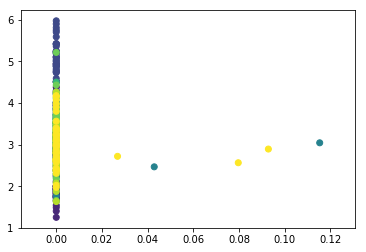

In [81]:
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1], c = mat['labels'][0])

In [64]:
g

19848